In [3]:
from sklearn.cross_validation import KFold
from sklearn.svm import LinearSVC,SVC 
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
try:
    from itertools import izip
except ImportError:
        izip = zip

In [4]:
def Run_Classifier(train_indices,test_indices, X, y,c):
    classifier=SVC(C=5, kernel='rbf', degree=3, decision_function_shape='ovr', random_state=None)


    X1 = X[train_indices]
    y1 = y[train_indices]
    randls = np.random.permutation(X1.shape[0])
    X_trnR = X1[randls,:]
    y_trnR = y1[randls]

    classifier.fit(X_trnR,y_trnR)
    y_test=y[test_indices]
    y_predicted=classifier.predict(X[test_indices])
    return y_test,y_predicted

In [30]:
if __name__ == '__main__':
    print ("Start loading...")

    X_female_us = np.load(r"C:\Users\Dell\Documents\Project Files\X_female.dat")

    y_female = np.load(r"C:\Users\Dell\Documents\Project Files\y_female.dat")


    scaler_f = StandardScaler(copy=True, with_mean=True, with_std=True)
    X_female = scaler_f.fit_transform(X_female_us)
    print ("Done.")

Start loading...
Done.


In [31]:
    efficiency_male=efficiency_female=0
    # total=0
    kf=KFold(len(y_female),n_folds=15)

    list_test_female=[]

    list_pred_female=[]

    total=0

    y_test_female=[]
    y_pred_female=[]
    

    recall_female=[0,0,0,0,0,0,0,0]
    precision_female=[0,0,0,0,0,0,0,0]
    f1_female=[0,0,0,0,0,0,0,0]	

    accuracy_female_avg=0
    recall_female_avg=0
    precision_female_avg=0

    f1_female_avg=0
    label_list=['anger','disgust','fear','happy','neutral','sadness','sarcastic','surprise']
    for train_inds,test_inds in kf:

        y_test_female,y_pred_female=Run_Classifier(train_inds, test_inds, X_female, y_female, 0)

        accuracy_female_avg+=(accuracy_score(y_test_female,y_pred_female)*100.0)

        recall_female_avg+=(recall_score(y_test_female,y_pred_female,average='macro')*100.0)

        precision_female_avg+=(precision_score(y_test_female,y_pred_female,average='macro')*100.0)

        f1_female_avg+=(f1_score(y_test_female,y_pred_female,average='macro')*100.0)

        temp=recall_score(y_test_female,y_pred_female,average=None)
        temp2=[sum(x) for x in izip(recall_female,temp)]
        recall_female=temp2[:]
        temp=precision_score(y_test_female,y_pred_female,average=None)
        temp2=[sum(x) for x in izip(precision_female,temp)]
        precision_female=temp2[:]
        temp=f1_score(y_test_female,y_pred_female,average=None)
        temp2=[sum(x) for x in izip(f1_female,temp)]
        f1_female=temp2[:]

        list_test_female.extend(y_test_female)
        list_pred_female.extend(y_pred_female)
        total+=1

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Female
Accuracy avg : 12.5
Recall avg : 12.5
Precision avg : 1.5625
F1 avg : 2.77777777778
['anger', 'disgust', 'fear', 'happy', 'neutral', 'sadness', 'sarcastic', 'surprise']
[[  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]]
for female
anger	0.00	0.00	0.00
disgust	0.00	0.00	0.00
fear	0.00	0.00	0.00
happy	0.00	0.00	0.00
neutral	0.00	0.00	0.00
sadness	0.00	0.00	0.00
sarcastic	0.00	0.00	0.00
surprise	0.00	0.00	0.00


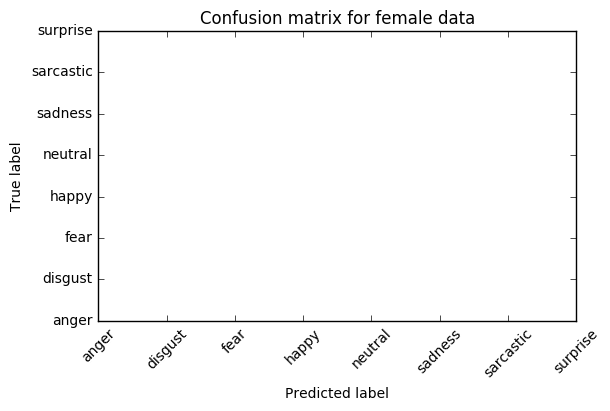

In [36]:

print("Female")
print("Accuracy avg : "+str((accuracy_female_avg/total)))
print("Recall avg : "+str((recall_female_avg/total)))
print("Precision avg : "+str((precision_female_avg/total)))
print("F1 avg : "+str((f1_female_avg/total)))

recall_female[:]=[x/total for x in recall_female]
precision_female[:]=[x/total for x in precision_female]
f1_female[:]=[x/total for x in f1_female]

cm_female=confusion_matrix(list_test_female,list_pred_female)

cm_norm_female = cm_female.astype('float') / cm_female.sum(axis=1)[:, np.newaxis]
print (label_list)

print(cm_female)
print("for female")
for x in label_list:
    print(x+"\t%.2f"%recall_female[label_list.index(x)]+"\t%.2f"%precision_female[label_list.index(x)]+"\t%.2f"%f1_female[label_list.index(x)])
    plt.figure(1)

plt.title("Confusion matrix for female data")
# plt.colorbar()
tick_marks = np.arange(len(label_list))
plt.xticks(tick_marks, label_list, rotation=45)
plt.yticks(tick_marks, label_list)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [37]:
    print("Female")
    print("Accuracy avg : "+str((accuracy_female_avg/total)))
    print("Recall avg : "+str((recall_female_avg/total)))
    print("Precision avg : "+str((precision_female_avg/total)))
    print("F1 avg : "+str((f1_female_avg/total)))

Female
Accuracy avg : 12.5
Recall avg : 12.5
Precision avg : 1.5625
F1 avg : 2.77777777778


In [38]:
    recall_female[:]=[x/total for x in recall_female]
    precision_female[:]=[x/total for x in precision_female]
    f1_female[:]=[x/total for x in f1_female]

    cm_female=confusion_matrix(list_test_female,list_pred_female)

    cm_norm_female = cm_female.astype('float') / cm_female.sum(axis=1)[:, np.newaxis]
    print (label_list)

    print('Normalized female confusion matrix')
    print(cm_female)

    print("for female")	
    for x in label_list:
        print(x+"\t%.2f"%recall_female[label_list.index(x)]+"\t%.2f"%precision_female[label_list.index(x)]+"\t%.2f"%f1_female[label_list.index(x)])

    

['anger', 'disgust', 'fear', 'happy', 'neutral', 'sadness', 'sarcastic', 'surprise']
Normalized female confusion matrix
[[  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]]
for female
anger	0.00	0.00	0.00
disgust	0.00	0.00	0.00
fear	0.00	0.00	0.00
happy	0.00	0.00	0.00
neutral	0.00	0.00	0.00
sadness	0.00	0.00	0.00
sarcastic	0.00	0.00	0.00
surprise	0.00	0.00	0.00


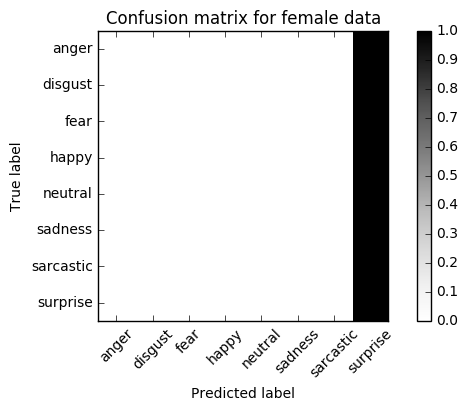

In [40]:
plt.figure(1)
plt.imshow(cm_norm_female, interpolation='nearest', cmap=plt.cm.Greys)
plt.title("Confusion matrix for female data")
plt.colorbar()
tick_marks = np.arange(len(label_list))
plt.xticks(tick_marks, label_list, rotation=45)
plt.yticks(tick_marks, label_list)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()